<h1>Ames Housing prices </h1>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlip as plt
%matplotlib inline

In [9]:
url="https://raw.githubusercontent.com/ywchiu/riii/master/data/house-prices.csv"

In [10]:
housing=pd.read_csv(url)

In [11]:
housing.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [13]:
housing.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [14]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Home,128.0,64.500000,37.094474,1.0,32.75,64.5,96.25,128.0
Price,128.0,130427.343750,26868.770371,69100.0,111325.00,125950.0,148250.00,211200.0
SqFt,128.0,2000.937500,211.572431,1450.0,1880.00,2000.0,2140.00,2590.0
Bedrooms,128.0,3.023438,0.725951,2.0,3.00,3.0,3.00,5.0
Bathrooms,128.0,2.445312,0.514492,2.0,2.00,2.0,3.00,4.0
Offers,128.0,2.578125,1.069324,1.0,2.00,3.0,3.00,6.0


<h1>correlation </h1>

In [15]:
housing.corr()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
Home,1.000000,0.108190,0.168553,-0.068568,0.127694,-0.053597
Price,0.108190,1.000000,0.552982,0.525926,0.523258,-0.313636
SqFt,0.168553,0.552982,1.000000,0.483807,0.522745,0.336923
Bedrooms,-0.068568,0.525926,0.483807,1.000000,0.414556,0.114271
Bathrooms,0.127694,0.523258,0.522745,0.414556,1.000000,0.143793
Offers,-0.053597,-0.313636,0.336923,0.114271,0.143793,1.000000


<AxesSubplot:>

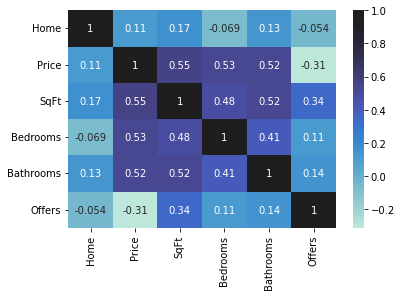

In [16]:
 sns.heatmap(housing.corr(),center =True ,annot=True)

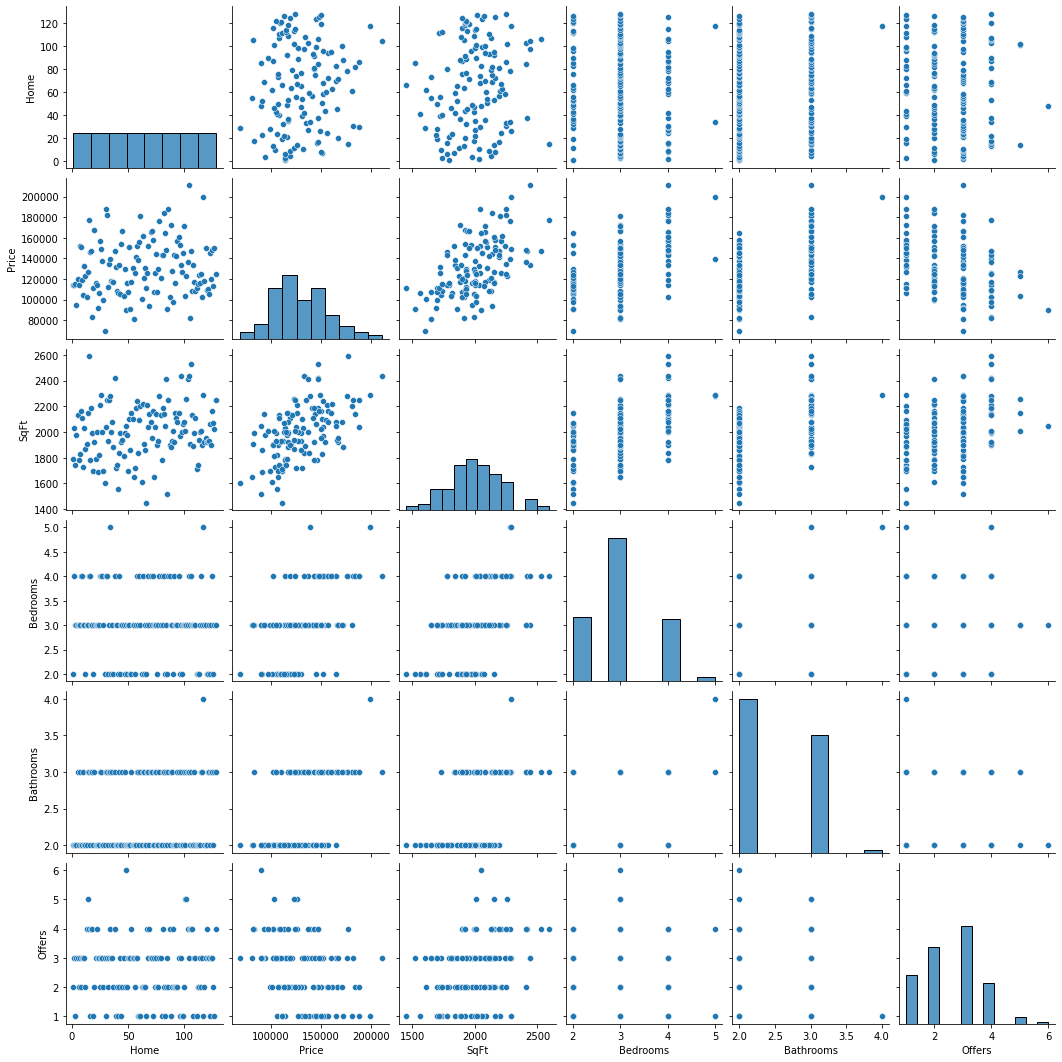

In [17]:
sns.pairplot(housing)

##building machine learning model


In [18]:
housing.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [40]:
x=housing[['Home', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']]

In [41]:
y=housing['Price']

In [42]:
y.head()

0    114300
1    114200
2    114800
3     94700
4    119800
Name: Price, dtype: int64

In [43]:
x.head()

,Home,SqFt,Bedrooms,Bathrooms,Offers
0,1,1790,2,2,2
1,2,2030,4,2,3
2,3,1740,3,2,1
3,4,1980,3,2,3
4,5,2130,3,3,3


##splitting the data

In [44]:
from sklearn.model_selection import train_test_split ,cross_val_score

In [45]:
x_train,x_test,y_train ,y_test= train_test_split(x,y,test_size=0.3,random_state=10123)

In [46]:
x_train.shape

(89, 5)

In [47]:
x_test.shape

(39, 5)

 ## standardization

In [48]:
#نعمل ال variance يبقي واحد لكله
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler=MinMaxScaler()

In [50]:
scaler.fit(x_train)

MinMaxScaler()

In [51]:
x_train=scaler.transform(x_train)

In [52]:
x_train.max()

1.0000000000000002

In [53]:
x_train.min()

0.0

In [54]:
x_test=scaler.transform(x_test)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lreg = LinearRegression()

In [60]:
lreg.fit(x_train,y_train)

LinearRegression()

In [61]:
pred =lreg.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
mse =mean_squared_error(y_test,pred)

In [65]:
print(np.sqrt(mse))

16722.455792306806
